<a href="https://colab.research.google.com/github/ssannkkallpp/covidsimulator/blob/master/Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Simulation
Refer to https://hackmd.io/@sudhanshu2/BkpvZp-oU for notes.

In [0]:
!pip install nx_altair

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
from random import choice 
import random

from bokeh.io import output_file, show, output_notebook
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool, 
                          BoxZoomTool, ResetTool, )
from bokeh.palettes import Spectral4
from bokeh.models.graphs import from_networkx

output_notebook()

In [0]:
# Intialize Values

population = 10**3
infected = 100
susceptible = 0
recovered = 0
probability = 0.05
total_infected = 100 # we initially set the total number of infected people to the seed value but it is dynamically updated as 

# Age Distribution for 0-14, 15-24, 25-44, 45-64 and 65+ in India
age_distribution = [35.3, 18.4, 27.6, 13.5, 4.8]

In [0]:
# Initialize Graph 

G = nx.fast_gnp_random_graph(population, probability)
pos = nx.spring_layout(G)

In [0]:
# Color Nodes

colour_list = {"AD" : 0, "T" : 0, "YA" : 0, "MA" : 0, "O" : 0}
node_attrs = {}

for node in G.nodes:
  if ((100.0 * colour_list["AD"]) / population) < age_distribution[0]:
    node_attrs[node] = {'age': "AD", 'node_color': "#81C784"}
    colour_list["AD"] += 1
  elif ((100.0 * colour_list["T"]) / population) < age_distribution[1]:
    node_attrs[node] = {'age': "T", 'node_color': "#4FC3F7"}
    colour_list["T"] += 1
  elif ((100.0 * colour_list["YA"]) / population) < age_distribution[2]:
    node_attrs[node] = {'age': "YA", 'node_color': "#FFF176"}
    colour_list["YA"] += 1
  elif ((100.0 * colour_list["MA"]) / population) < age_distribution[3]:
    node_attrs[node] = {'age': "MA", 'node_color': "#FFB74D"}
    colour_list["MA"] += 1
  else:
    node_attrs[node] = {'age': "O", 'node_color': "#E57373"}
    colour_list["O"] += 1

nx.set_node_attributes(G, node_attrs)

In [24]:
plot = Plot(plot_width=600, plot_height=600, x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))
plot.add_tools(BoxZoomTool(), ResetTool(), TapTool(), BoxSelectTool())

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color="node_color", line_color="#616161")
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color="node_color", line_color="#616161")
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color="node_color", line_color="#616161")

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#BDBDBD", line_alpha=0.8, line_width=1)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color="#616161", line_width=1)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color="#212121", line_width=1)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)

show(plot)

In [0]:
def spread(G, size, labels):
	total_infected = 100
	tround = 1 # this variable marks the round of transmission 
	while True:
		tround += 1
		for v in list(G.nodes):

			if labels[v][0] == "R" or labels[v][0] == "D":
				continue
			# ignore the nodes that are either dead or recovered

			elif labels[v][0] == "S":
				neighbors = list(G.neighbors(v))
				for u in neighbors:  # for nodes that are still susceptible
					if labels[u][0] == "I":
						if labels[u][1] in range(2, 10): 
							if G[v][u]['weight'] > 0.3:
								labels[v] = ("I", tround)
								total_infected += 1
						else:
							if G[v][u]['weight'] > 0.6:
								labels[v] = ("I", tround)
								total_infected += 1

			else:
				# in this case the node is already infected or "I"
				if (tround - labels[v][1]) > 27:
				# if the person has been infected for more than an average of 4 weeks
				# then they either die or recovers.
				# a day here maps to one round of transmission
					if random.randint(0, 100) < 40:
						labels[v] = ("R", 0)
					else:
						labels[v] = ("D", 0)
				continue

		print(total_infected)


TabError: ignored

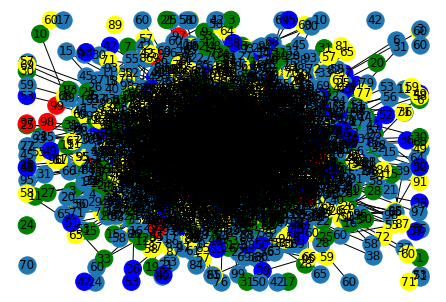

In [0]:
for i in range(1, 30): # seperate connected components for each of the 30 major hubs
  create_graph(100, 0.05)

plt.axis("off")
plt.show()

plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Graph Interaction Demonstration"

node_hover_tool = HoverTool(tooltips=[("index", "@index"), ("club", "@club")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.edge_renderer.glyph = MultiLine(line_color="edge_color", line_alpha=0.8, line_width=1)
plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)

## In-development
Running these blocks might affect the rest of the code, run them with caution.

In [0]:
def create_graph(size, p):
	G = networkx.erdos_renyi_graph(size, p)
	positions = networkx.spring_layout(G)
	map = colour_graph(G, size)
	count = 0
	labels = {}	
	for node in G:
		if (random.randint(0,1) == 1) and count < infected:
			labels[node] = ("I", 1)
			count = count + 1
		else:
			labels[node] = ("S", 0)
	 
	for (u, v) in G.edges():
		num = random.randint(1,100)
		G[u][v]['weight'] = (1.0/num) # edge weights are transition probabilities 

		# initially we give the infected label randomly to some percentage of the population
		# and everyone else is initially susceptible 
	spread(G, size, labels) # call spread function to compute basic simulation on 
	networkx.draw(G, node_color=map, with_labels=True)
  networkx.draw_network_labels(G, positions, labels, font_size=16,font_color='black'))

In [0]:
# Does not work

current_time = 1
currently_infected = set()
not_infected = set()

label = {}	
count = 0
for u in G:
  if (random.randint(0,1) == 1) and count < infected:
    label[u] = ("I", current_time)
    count = count + 1
    currently_infected.add(u)
  else:
    label[u] = ("S", current_time)

while len(currently_infected) < population * 0.7:
  current_time += 1
  new_infections = set()
  print(current_time)
  for u in currently_infected:
    if label[u][0] == 'I':
      if (current_time - label[u][1]) > 27:
        if random.randint(0, 10) > 1:
          label[u] = ("R", current_time)
        else:
          label[u] = ("D", current_time)
      else:
        for v in list(G.neighbors(u)):
          if label[v][0] == 'S' and random.randint(0, 100) < 3:
            label[v] = ("I", current_time)
            new_infections.add(v)
  print(len(currently_infected))
  print(len(new_infections))
  currently_infected.union(new_infections)


Streaming output truncated to the last 5000 lines.
64964
100
0
64965
100
0
64966
100
0
64967
100
0
64968
100
0
64969
100
0
64970
100
0
64971
100
0
64972
100
0
64973
100
0
64974
100
0
64975
100
0
64976
100
0
64977
100
0
64978
100
0
64979
100
0
64980
100
0
64981
100
0
64982
100
0
64983
100
0
64984
100
0
64985
100
0
64986
100
0
64987
100
0
64988
100
0
64989
100
0
64990
100
0
64991
100
0
64992
100
0
64993
100
0
64994
100
0
64995
100
0
64996
100
0
64997
100
0
64998
100
0
64999
100
0
65000
100
0
65001
100
0
65002
100
0
65003
100
0
65004
100
0
65005
100
0
65006
100
0
65007
100
0
65008
100
0
65009
100
0
65010
100
0
65011
100
0
65012
100
0
65013
100
0
65014
100
0
65015
100
0
65016
100
0
65017
100
0
65018
100
0
65019
100
0
65020
100
0
65021
100
0
65022
100
0
65023
100
0
65024
100
0
65025
100
0
65026
100
0
65027
100
0
65028
100
0
65029
100
0
65030
100
0
65031
100
0
65032
100
0
65033
100
0
65034
100
0
65035
100
0
65036
100
0
65037
100
0
65038
100
0
65039
100
0
65040
100
0
65041
100
0
65042
100
0
6

KeyboardInterrupt: ignored